# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd

# Load image files
folder_name     = "traffic-signs-data/"
training_file   = folder_name + "train.p"
validation_file = folder_name + "valid.p"
testing_file    = folder_name + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train, size_train, coord_train = train['features'], train['labels'], train['sizes'], train['coords']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

# Load csv
names = {}
csv = pd.read_csv('signnames.csv', sep=',')
for line in csv.values:
    names[line[0]] = line[1]
#print(names)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Data summary
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes_train = len(np.unique(y_train))
n_classes_valid = len(np.unique(y_valid))
n_classes = n_classes_train

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes_train, "(train) /", n_classes_valid, "(valid)")

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43 (train) / 43 (valid)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

label train valid ratio  sign names
    0   180    30  0.17  Speed limit (20km/h)
    1  1980   240  0.12  Speed limit (30km/h)
    2  2010   240  0.12  Speed limit (50km/h)
    3  1260   150  0.12  Speed limit (60km/h)
    4  1770   210  0.12  Speed limit (70km/h)
    5  1650   210  0.13  Speed limit (80km/h)
    6   360    60  0.17  End of speed limit (80km/h)
    7  1290   150  0.12  Speed limit (100km/h)
    8  1260   150  0.12  Speed limit (120km/h)
    9  1320   150  0.11  No passing
   10  1800   210  0.12  No passing for vehicles over 3.5 metric tons
   11  1170   150  0.13  Right-of-way at the next intersection
   12  1890   210  0.11  Priority road
   13  1920   240  0.12  Yield
   14   690    90  0.13  Stop
   15   540    90  0.17  No vehicles
   16   360    60  0.17  Vehicles over 3.5 metric tons prohibited
   17   990   120  0.12  No entry
   18  1080   120  0.11  General caution
   19   180    30  0.17  Dangerous curve to the left
   20   300    60  0.20  Dangerous curve 

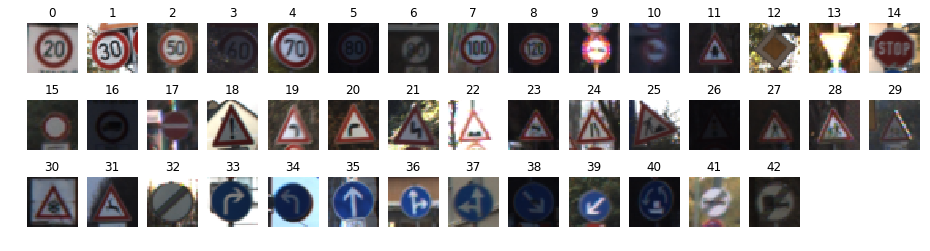

In [3]:
### Data exploration

import math
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

count_class_valid = []
for n in range(0, n_classes_train):
    index_class = y_valid == n
    image_class = x_valid[index_class]
    count = len(image_class)
    count_class_valid.append(count)
    
# draw image gallery - 43 class random samples
n_col = 15
n_row = math.ceil(n_classes_train/n_col)
count_class_train = []
plt.figure(n_classes_train, figsize=(16, 4))
for n in range(0, n_classes_train):
    index_class = y_train == n
    image_class = x_train[index_class]
    count = len(image_class)
    count_class_train.append(count)
    
    sign_name = names[n]
    if (len(sign_name) > 15):
        sign_name = sign_name[0:15] + ".."

    image = image_class[random.randint(0, count-1)] 
    plt.subplot(n_row, n_col, n+1)
    plt.title(n)
    plt.imshow(image.squeeze())
    plt.axis('off')
    
# print table summary
print("label train valid ratio  sign names")
for n in range(0, n_classes_train):
    print(
        "%5d %5d %5d  %1.2f  %s" %
        (n, count_class_train[n], count_class_valid[n], count_class_valid[n]/count_class_train[n], names[n])
    )


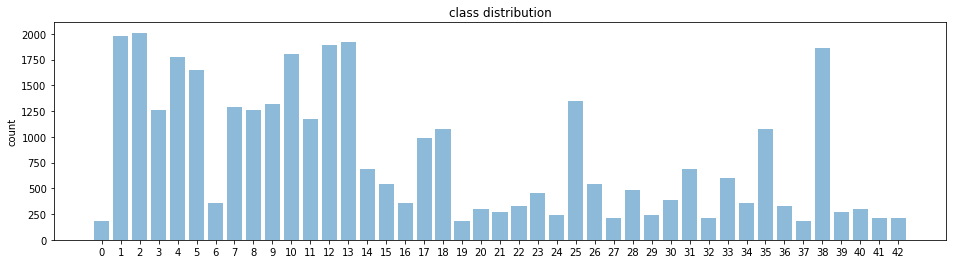

In [4]:
# draw bar chart as class distribution 
y_pos = np.arange(n_classes_train)
plt.figure(figsize=(16, 4))
plt.bar(y_pos, count_class_train, align='center', alpha=0.5)
plt.xticks(y_pos, y_pos)
plt.ylabel('count')
plt.title('class distribution')
plt.show()

label: 19
count: 180
label: 19
count: 30


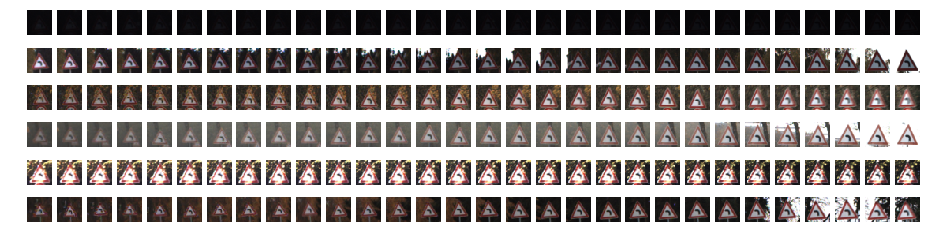

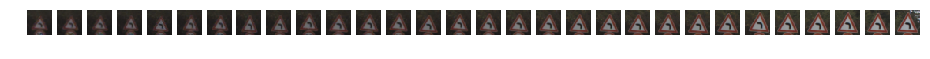

In [5]:
# draw image gallery - class i

def drawImageGallery(y_data, x_data):
    label_class_i = 19
    index_class_i = y_data == label_class_i
    image_class_i = x_data[index_class_i]
    n_class_i = len(image_class_i)    
    n_col = 30
    n_row = math.ceil(n_class_i/n_col)
    
    print("label:", label_class_i)
    print("count:", n_class_i)

    plt.figure(n_class_i, figsize=(16, 4))
    for n in range(0, n_class_i):
        image = image_class_i[n] 
        plt.subplot(n_row, n_col, n+1)
        plt.imshow(image.squeeze())
        plt.axis('off')

drawImageGallery(y_train, x_train)
drawImageGallery(y_valid, x_valid)    


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

index: 29117 out of 34799 samples
shape: (32, 32, 3) from image size: 69 x 72
label: 12 - Priority road


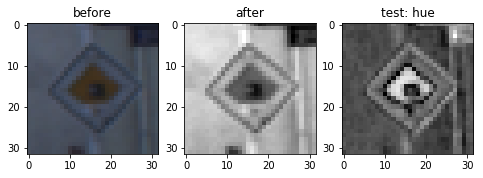

In [6]:
### Pre-processing
import cv2
from sklearn.utils import shuffle

# grayscale
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# huesscale
def huescale(img):
     return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:,:,1]

# normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
a = 0.1
b = 0.9
x_min = 0
x_max = 255
def normalize_grayscale(img, x_max=x_max):
    return a + (((img - x_min) * (b - a))) / (x_max - x_min)

def preprocess_images(images):
    return list(map(lambda img: normalize_grayscale(grayscale(img))[..., None], images))


# preprocess dataset
X_train = preprocess_images(x_train)
X_valid = preprocess_images(x_valid)
X_test  = preprocess_images(x_test)


# test
index = random.randint(0, len(X_train))
image_o = x_train[index].squeeze()
image_p = X_train[index].squeeze()
image_h = normalize_grayscale(huescale(np.copy(x_train[index])), 179)
size = size_train[index]
label = y_train[index]

print('index:', index, 'out of', n_train, 'samples')
print('shape:', image_o.shape, 'from image size:', size[0], 'x', size[1])
print('label:', label, '-', names[label])

plt.figure(3, figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.title("before")
plt.imshow(image_o)
plt.subplot(1, 3, 2)
plt.title("after")
plt.imshow(image_p, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("test: hue")
plt.imshow(image_h, cmap="gray")


# shuffle and split train and valid sets to 80/20 ?
# ...


### Model Architecture

In [7]:
### Initializations
import tensorflow as tf

mean = 0
stddev = 0.1
#w = np.random.randn(n) * sqrt(2.0/n)

# k outputs
k = [38, 64, 100, 50]
#k = [38, 64, 100, 100]
#k = [108, 108, 100, 100]
#k = [6, 16, 120, 84]

weights = {
    'wc1': tf.Variable(tf.truncated_normal((5, 5, 1, k[0]), mean, stddev)),
    'wc2': tf.Variable(tf.truncated_normal((5, 5, k[0], k[1]), mean, stddev)),
    'wf3': tf.Variable(tf.truncated_normal((5*5*k[1], k[2]), mean, stddev)), # model: single 
    #'wf3': tf.Variable(tf.truncated_normal(((14*14*k[0]+5*5*k[1]), k[2]), mean, stddev)), # model: multi-scale
    'wf4': tf.Variable(tf.truncated_normal((k[2], k[3]), mean, stddev)),
    'wf5': tf.Variable(tf.truncated_normal((k[3], n_classes), mean, stddev))
}

biases = {
    'bc1': tf.Variable(tf.zeros(k[0])),
    'bc2': tf.Variable(tf.zeros(k[1])),
    'bf3': tf.Variable(tf.zeros(k[2])),
    'bf4': tf.Variable(tf.zeros(k[3])),
    'bf5': tf.Variable(tf.zeros(n_classes))
}


In [8]:
# layer patterns

def convReLU(x, W, b, strides=1, padding='VALID'):
    conv = tf.nn.conv2d(
        x, 
        W, 
        strides=[1, strides, strides, 1], 
        padding=padding
    )
    conv = tf.nn.bias_add(conv, b)
    return tf.nn.relu(conv)

def pool(x, k=2, padding='VALID'):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding
    )

def fc(x, W, b):
    return tf.add(tf.matmul(x, W), b)

def fcReLUDropout(x, W, b, kp):
    fcrd = fc(x, W, b)
    fcrd = tf.nn.relu(fcrd)
    fcrd = tf.nn.dropout(fcrd, kp)
    return fcrd


In [9]:
from tensorflow.contrib.layers import flatten

GLOBALS_ACTIVATION = {}
def convNet(x, keep_prob):    
    # Input = 32x32x1.
    
    # Layers 
    # C1: Convolutional -> ReLU
    # Output = 28x28 x 6 (features, k1)
    c1 = convReLU(x, weights['wc1'], biases['bc1']) 
    # S1: Subsampling with Max Pooling
    # Output = 14x14 x 6 (k1)
    s1 = pool(c1, k=2)
    #print(s1)
    GLOBALS_ACTIVATION["c1"] = c1
    GLOBALS_ACTIVATION["s1"] = s1
    
    # C2: Convolutional -> ReLU
    # Output = 10x10 x 16 (features, k2)
    c2 = convReLU(s1, weights['wc2'], biases['bc2'])   
    # S2: Subsampling with Max Pooling
    # Output = 5x5 x 16 (k2)
    s2 = pool(c2, k=2)  
    #print(s2)
    GLOBALS_ACTIVATION["c2"] = c2    
    GLOBALS_ACTIVATION["s2"] = s2
     
    # Flatten 
    # model: single features
    # Output = 400 (<= 5x5x16, example) 
    ff = flatten(s2)
    # model: multi-scale features      
    #ff = tf.concat(1, [flatten(s1), flatten(s2)])
    #print(ff)
    
    # F3: Fully Connected -> ReLU -> Dropout
    # Output = * (hidden layers, k3)  
    f3 = fcReLUDropout(ff, weights['wf3'], biases['bf3'], keep_prob) 
    
    # F4: Fully Connected -> ReLU -> Dropout
    # Output = * (hidden layers, k4)
    f4 = fcReLUDropout(f3, weights['wf4'], biases['bf4'], keep_prob) 
    
    # F5: Fully Connected (logits)
    # Output = 43 (classes)
    logits = fc(f4, weights['wf5'], biases['bf5']) 
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train:

EPOCHS = 25
BATCH_SIZE = 128
KEEP_PROB = 0.5
LEARNING_RATE_ADAM = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = convNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy)
optimizer1 = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE_ADAM)
training_operation1 = optimizer1.minimize(loss_operation)

#LEARNING_RATE_ADAG = 0.1
#LEARNING_RATE_GD = 0.1
#optimizer2 = tf.train.AdagradOptimizer(learning_rate = LEARNING_RATE_ADAG)
#training_operation2 = optimizer2.minimize(loss_operation)
#optimizer3 = tf.train.GradientDescentOptimizer(learning_rate = LEARNING_RATE_MISC)
#training_operation3 = optimizer3.minimize(loss_operation)


In [11]:
### Train and Validate:
### Calculate and report the accuracy on the training and validation set.
from sklearn.utils import shuffle

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
saved_sess = './sessions/convnet'
#save_file = './sessions/init'

def evaluate(X_data, y_data, kp):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.save(sess, save_file)
    num_examples = len(X_train)
    
    print("epoch, train, valid")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation1, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            
        train_accuracy = evaluate(X_train, y_train, 1)
        validation_accuracy = evaluate(X_valid, y_valid, 1)
        print("{:5d}, {:.3f}, {:.3f}".format((i+1), train_accuracy, validation_accuracy)) 
        
        # early stop
        if train_accuracy > 0.99 and validation_accuracy > 0.96:
            if i < 25:
                print("Early stop due to target reached")
            break
            
    saver.save(sess, saved_sess)
    print("Model saved")
    
comment = '''    
    saver.restore(sess, save_file)
    print()
    print("epoch, train, valid")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation1, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            
        train_accuracy = evaluate(X_train, y_train, 1)
        validation_accuracy = evaluate(X_valid, y_valid, 1)
        print("{:5d}, {:.3f}, {:.3f}".format((i+1), train_accuracy, validation_accuracy))  
'''

epoch, train, valid
    1, 0.580, 0.509
    2, 0.765, 0.710
    3, 0.869, 0.813
    4, 0.896, 0.842
    5, 0.925, 0.884
    6, 0.936, 0.893
    7, 0.951, 0.907
    8, 0.962, 0.920
    9, 0.963, 0.921
   10, 0.971, 0.920
   11, 0.980, 0.939
   12, 0.983, 0.944
   13, 0.987, 0.947
   14, 0.989, 0.949
   15, 0.989, 0.950
   16, 0.993, 0.964
Early stop due to target reached
Model saved


In [12]:
### Test:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

with tf.Session() as sess:
    saver.restore(sess, saved_sess)

    test_accuracy = evaluate(X_test, y_test, 1)
    print("Accuracy = {:.3f} (test set)".format(test_accuracy))

Accuracy = 0.941 (test set)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

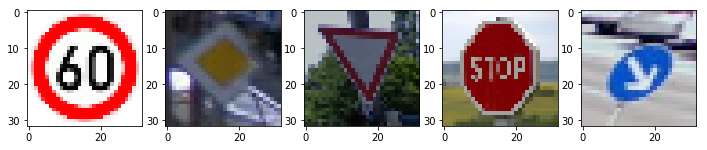

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

files = ["test_limit60", "test_priorityRoad", "test_yield", "test_stop", "test_keepRight"]#, "test_cat"]
n_img = len(files)

x_new_images = []
plt.figure(n_img, figsize=(12, 12))
for n in range(0, n_img):
    img = cv2.imread(folder_name + files[n] + ".png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32))
    plt.subplot(1, n_img, n+1)
    plt.imshow(img)
    x_new_images.append(img)
       

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

y_new_images = [3, 12, 13, 14, 38]#, 101]
X_new_images = preprocess_images(x_new_images)

with tf.Session() as sess:
    saver.restore(sess, saved_sess)
    
    test_prediction = tf.argmax(logits, 1)
    prediction = sess.run(test_prediction, feed_dict={x: X_new_images, keep_prob: 1})
    
    print('{:2}   {:20} {:20}'.format("", "PREDICTION", "TEST IMAGE"))
    for i in range(0, n_img):
        print('{:2}   {:20} {:20}'.format(prediction[i], names[prediction[i]], files[i]))

     PREDICTION           TEST IMAGE          
 3   Speed limit (60km/h) test_limit60        
12   Priority road        test_priorityRoad   
13   Yield                test_yield          
14   Stop                 test_stop           
38   Keep right           test_keepRight      


### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

n_correct = 0
for i in range(0, n_img):
    if prediction[i] == y_new_images[i]:
        n_correct = n_correct + 1

print("Accuracy = {:.3f} (test images)".format(n_correct/n_img))

Accuracy = 1.000 (test images)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, saved_sess)
    
    top_probabilities = tf.nn.top_k(tf.nn.softmax(logits), k=5)
    probabilities = sess.run(top_probabilities, feed_dict={x: X_new_images, keep_prob: 1})
    
print(probabilities)
print("=>")    
for i in range(0, n_img):
    p = probabilities[0][i]
    n = probabilities[1][i]
    print(files[i])
    print("P1: {:20} P2: {:20} P3: {:20}".format(names[n[0]], names[n[1]], names[n[2]]))
    print("    {:.8f}{:15}{:.8f}{:15}{:.8f}".format(p[0],"", p[1],"", p[2]))
    print()

TopKV2(values=array([[  9.99862432e-01,   8.33356899e-05,   4.94330379e-05,
          3.74577189e-06,   4.81857114e-07],
       [  9.70488071e-01,   2.90123094e-02,   2.14534710e-04,
          8.43951639e-05,   7.78723188e-05],
       [  9.99999881e-01,   1.08666853e-07,   2.43084608e-10,
          1.00810700e-10,   3.41487624e-12],
       [  9.91563320e-01,   4.87395888e-03,   1.70531834e-03,
          1.10181933e-03,   2.60297325e-04],
       [  9.99720156e-01,   2.09923848e-04,   6.78261567e-05,
          1.26358248e-06,   3.71872517e-07]], dtype=float32), indices=array([[ 3, 36, 32, 35, 28],
       [12, 40, 41, 11, 42],
       [13, 35, 38, 12, 10],
       [14, 33, 17, 34, 13],
       [38, 34, 13, 12, 25]], dtype=int32))
=>
test_limit60
P1: Speed limit (60km/h) P2: Go straight or right P3: End of all speed and passing limits
    0.99986243               0.00008334               0.00004943

test_priorityRoad
P1: Priority road        P2: Roundabout mandatory P3: End of no passing   
 

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


feature maps:


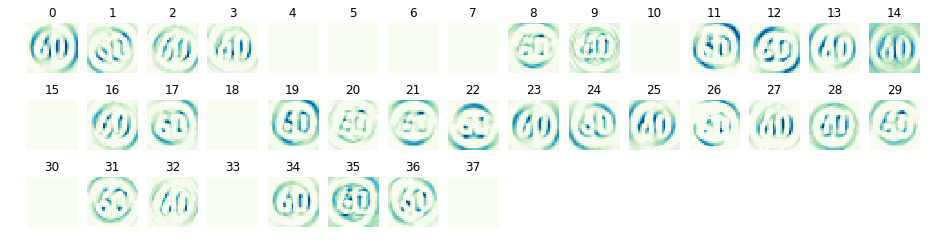

In [17]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = np.reshape(image_input, (-1, 32, 32, 1))
    
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    
    print("feature maps:")
    plt.figure(plt_num, figsize=(16, 4))
    for featuremap in range(featuremaps):
        plt.subplot(3, 15, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title(str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="seismic")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="GnBu")
  
with tf.Session() as sess:
    saver.restore(sess, saved_sess)
    outputFeatureMap(X_new_images[0], GLOBALS_ACTIVATION["c1"])

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 